# Homework 1

In this exercise you will learn how to use the `python` graph library `networkx` to represent and work with graphs. Most of this course focuses on the mathematical proofs of spectral graph theory, but a small part of it will focus on applying these techniques in practice to real graphs.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Types of Graphs

In `networkx` There are four basic graph types as Python classes, based on whether the graph is directed and simple.

`Graph`<br>
This class implements an undirected graph. It ignores multiple edges between two nodes. It does allow self-loop edges between a node and itself.

`DiGraph`<br>
Directed graphs, that is, graphs with directed edges. Provides operations common to directed graphs, (a subclass of Graph).

`MultiGraph`<br>
A flexible graph class that allows multiple undirected edges between pairs of nodes. The additional flexibility leads to some degradation in performance, though usually not significant.

`MultiDiGraph`<br>
A directed version of a MultiGraph.

In this class we will use mostly `Graph`.

In [2]:
G = nx.Graph()

## Creating graphs

In `networkx` you can add nodes and edges one by one by using the `add_node` and `add_edge` methods. All nodes mush be `hashable` as defined by Python. If one or both endpoints of the edge are missing, they are automatically created. Every node and edge can have arbitrary attributes, that can be specified at creation or altered later.

In [3]:
G.add_node(1)
G.add_node(2, label=1)
G.add_edge(1,2)
G.add_edge(2, 3, weight=2)

#### Your turn!

Using the above methods, create $P_n$.

In [5]:
n = 10
P = nx.Graph()

# TODO: Fill out code here.
for node in range(n):
    P.add_node(node, label=node)

#Adding random edges to the graph
import random
edge_probability = 0.2
for node1 in P.nodes():
    for node2 in P.nodes():
        if node1 != node2 and random.random() < edge_probability:
            P.add_edge(node1, node2)

print(P)

Graph with 10 nodes and 16 edges


### Graphs from collections

Adding one node or edge at a time is costly. Instead, `networkx` provides ways to add a collection of nodes or edges.

In [7]:
nodes = np.arange(1, 4)
G.add_nodes_from(nodes)

elist = [(1, 2), (2, 3), (1, 4), (4, 2)]
G.add_edges_from(elist)

elist = [('a', 'b', 5.0), ('b', 'c', 3.0), ('a', 'c', 1.0), ('c', 'd', 7.3)]
G.add_weighted_edges_from(elist)

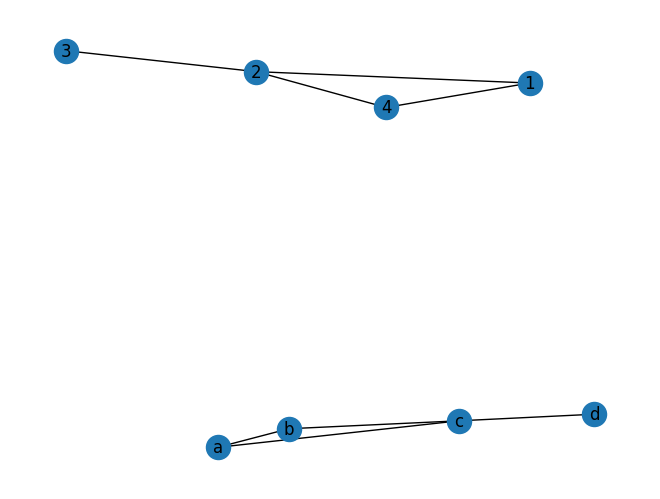

In [10]:
nx.draw(G, with_labels=True)

For a complete reference of all the ways and formats you can construct, read and write graphs you can visit the reference for the [reading and writing graphs](https://networkx.org/documentation/stable/reference/readwrite/index.html#readwrite) subpackage.

#### Your turn!

Using the more advanced methods, create the $n \times m$ [torus grid](https://en.wikipedia.org/wiki/Toroidal_graph) where each node is connected to the four surrounding nodes, wrapping around in each direction.

In [11]:
def generate_torus(n, m):
    # TODO: Return T_{nm}, the n x m torus grid.
    #       Each edge should have a color attribute.
    #       Color the vertical edges red and the horizontal blue.
    
    
    # This will just be the graph stored as a matrix
    # for convenience
    M = []
    T = nx.Graph()

    #Adding Nodes
    for i in range(n):
        row = []
        for j in range(m):
            T.add_node(i * m + j, label= "{}".format(i * m + j))
            row.append(i * m + j)
        M.append(row)

    #Adding Edges
    for i in range(n):
        for j in range(m):
            adj_nodes = {}
            element = i * m + j
            if not T.has_edge(element, M[i-1][j]):
                adj_nodes[(element, M[i-1][j])] = 'red'

            if not T.has_edge(element, M[i][j-1]):
                adj_nodes[(element, M[i][j-1])] = 'blue'

            if i+1 >= n and not T.has_edge(element, M[0][j]): 
                    adj_nodes[(element, M[0][j])] = 'red' 

            if i+1 < n and not T.has_edge(element, M[i+1][j]):
                adj_nodes[(element, M[i+1][j])] = 'red'

            if j+1 >= m and not T.has_edge(element, M[i][0]):
                adj_nodes[(element, M[i][0])] = 'blue'

            if j+1 < m and not T.has_edge(element, M[i][j+1]):
                adj_nodes[(element, M[i][j+1])] = 'blue'

            for edge, color in adj_nodes.items():
                T.add_edge(edge[0], edge[1], edge_color=color)

    return T

T = generate_torus(10, 20)

## Graph Generators

Of course, an advanced graph library like `networkx` already has generators for these simple graphs. You can read more by visiting the reference for [graph generators](https://networkx.org/documentation/stable/reference/generators.html). We will load two real networks, Zachary's Karate Club graph and the co-appearance graph in the novel Les Miserable.

Zachary's Karate Club graph is a real social network assembled by anthropologist and computer scientist Wayne W. Zachary. The Karate Club includes 34 members and 78 connections. During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate. Based on collected data Zachary correctly assigned all but one member of the club to the groups they actually joined after the split. The member that was misclassified had external reasons for following "Mr. Hi".

Les Miserable co-appearance graph has 77 nodes and 254 weighted edges, based on how many times two characters appear together.

In [12]:
karate = nx.karate_club_graph()
les_miserables = nx.les_miserables_graph()

## The Graph properties

The most important properties that `networkx` exposes are `G.nodes` and `G.edges`. These are internally stored views of dicts-of-dicts-of-dicts since most graphs are sparse. `G.adj` shows the actual 

In [13]:
print(f'The nodes of graph G are {G.nodes}')
print()
print(f'The edges of graph G are {G.edges}')
print()
print(f'The adjacency of node b in graph G is {G["b"]}')
print()
print(f'The full adjacency of graph G is')
for v in G.nodes:
    print(G[v])
print()
print(f'The weight of the edge {{2, 3}} is G[2][3][\'weight\'] = {G[2][3]["weight"]}')

The nodes of graph G are [1, 2, 3, 4, 'a', 'b', 'c', 'd']

The edges of graph G are [(1, 2), (1, 4), (2, 3), (2, 4), ('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')]

The adjacency of node b in graph G is {'a': {'weight': 5.0}, 'c': {'weight': 3.0}}

The full adjacency of graph G is
{2: {}, 4: {}}
{1: {}, 3: {'weight': 2}, 4: {}}
{2: {'weight': 2}}
{1: {}, 2: {}}
{'b': {'weight': 5.0}, 'c': {'weight': 1.0}}
{'a': {'weight': 5.0}, 'c': {'weight': 3.0}}
{'b': {'weight': 3.0}, 'a': {'weight': 1.0}, 'd': {'weight': 7.3}}
{'c': {'weight': 7.3}}

The weight of the edge {2, 3} is G[2][3]['weight'] = 2


### Your turn!

Take your torus graph `T` from before and count the number of red and blue edges.

In [16]:
# TODO: Count the number of blue and red edges in the torus graph T
red = sum([0 if data['edge_color'] == 'blue' else 1 for u, v, data in T.edges(data=True)])
blue = sum([0 if data['edge_color'] == 'red' else 1 for u, v, data in T.edges(data=True)])

print(f'There are {red} red edges and {blue} blue edges.')

There are 200 red edges and 200 blue edges.


## Drawing Graphs

Most times it is helpful to draw a graph as it helps visualize it. The library offers a generic drawing method `nx.draw`, but also more specific methods for the nodes or edges in the [drawing](https://networkx.org/documentation/stable/reference/drawing.html#drawing) module

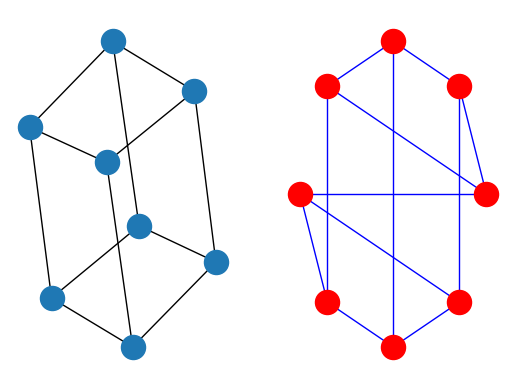

In [17]:
cube = nx.cubical_graph()
subax1 = plt.subplot(121)
nx.draw(cube)   # default spring_layout
subax2 = plt.subplot(122)
nx.draw(cube, pos=nx.circular_layout(cube), node_color='r', edge_color='b')

We can use the same methods to draw the `karate` and `les_miserable` networks.

### Your turn!

Draw the karate network. Requirements:
- Use the `spring_layout` for positions.
- Nodes that have the value `"Officer"` in the `club` property are colored `tab:blue`, the ones with value `"Mr. Hi"` are colored `tab:green`.
- Node names (0-33) should be displayed in white font.
- Edges between inside each community should have the same color as the community.
- Edges across communities should be `tab:red`.

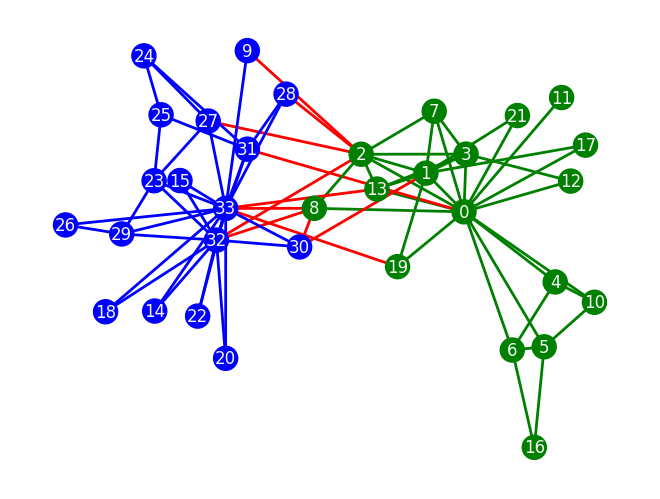

In [18]:
# TODO: Draw the karate graph as described above.
for node1 in karate.nodes():
    for node2 in karate.nodes():
        if karate.has_edge(node1, node2):
            club1 = karate.nodes[node1]['club']
            club2 = karate.nodes[node2]['club']
            
            if club1 == club2:    
                #Are in the same club, check which
                
                if club1 == 'Mr. Hi':
                    karate[node1][node2]['color'] = 'green'
                else:
                    #nx.edge_attr(karate, 'color', node1, node2, 'blue')
                    karate[node1][node2]['color'] = 'blue'
            
            else:
                #Not in same club, color red
                
                karate[node1][node2]['color'] = 'red'
                
#Getting color map for nodes
color_map = ['blue' if data['club'] == 'Officer' else 'green' for u, data in karate.nodes(data=True)]
#Extracting edge color
edge_colors = [karate[u][v]['color'] for u, v in karate.edges()]

pos = nx.spring_layout(karate)
pc = nx.draw(karate, pos=pos, node_color=color_map, with_labels=True, font_color="whitesmoke", edge_color=edge_colors, width=2)

# Heat Equation and Spectral Embedding

In class we saw how following the dynamics of the Heat Equation will yield the vector $\mathbf{v} = \arg \min_{\mathbf{x} \perp 1} \frac{\mathbf{x}^T \mathbf{L}_G \mathbf{x}}{\mathbf{x}^T \mathbf{D}_G \mathbf{x}}$.

In this section you will implement the dynamic $\mathbf{x}_{t + 1} = \mathbf{x}_t - \frac{1}{2}\mathbf{D}_G^{-1} \mathbf{L}_G \mathbf{x}_t$ to approximate the second eigenvalue. Your goal is to approximate the second eigenvector by following this evolution.

### Heat Evolution

Complete the following function which takes in a graph $G$, an initial $\mathbf{x}_0 \in \mathbb{R}^{n \times d}$ and a target bound $\epsilon$ for the Dirichlet energy $\mathcal{U}(\mathbf{x}) = \|\mathbf{x} - \bar{x} \mathbf{1}\|_{\mathbf{D}_G}$ and returns the iterates $\mathbf{X} \in \mathbb{R}^{T \times n \times d}$.

In [ ]:
from typing import Tuple

def heat_diffusion(G: nx.Graph, x_0: np.ndarray, epsilon: float=1e-6) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """Heat Diffusion
    
    Given a graph `G` and an initial `x_0` runs heat diffusion until $\mathcal{U}(\mathbf{x}) < \epsilon$.
    
    Parameters
    ----------
        G : nx.Graph
            Graph to run heat diffusion on.
        x_0 : np.ndarray
            Initial heat distribution x_0. Should be n x d array. d might be 1.
        epsilon : float
            Stopping criterion is the Dirichlet energy of the heat distribution to be less than epsilon.
    
    Returns
    -------
        x : np.ndarray
            The T x n x d evolution of x_0.
        y : np.ndarray
            Flow going through each edge. Should be T x m x d
        fx: np.ndarray
            The value of U(x(t)) at each time t.
    """
    n = nx.number_of_nodes(G)
    m = nx.number_of_edges(G)
    assert x_0.shape[0] == n, "x_0 does not have the right shape."
    d = x_0.shape[1]
    
    # TODO: You should fill out the following funtion.
    #       All transformations and intermediate results should be computed using matrix multiplications
    
    return np.zeros((1, n, d)), np.zeros((1, m, d)), np.array([0])

x0 = np.random.rand(len(les_miserables), 2)
x, y, fx = heat_diffusion(les_miserables, x0)

We can use the returned $\mathbf{x}$ as positions to see how the heat equation evolves in time. Fill in the following function to draw the animation of heat diffusion on the Les Miserable graph.

In [ ]:
from matplotlib.animation import FuncAnimation

# TODO: Use draw_networkx_nodes to get a PathCollection of the node plot.
#       Use draw_networkx_edges to get a LineCollection of the edge plot.
#       Edge linewidth should be proportional to the \ell_2 norm of the flow along that edge.
#       The color of each node should be proportional to its contribution to the total Dirichlet energy.

t, n, d = x.shape
fig = plt.figure()

pos = {v: x0[i] for i, v in enumerate(les_miserables.nodes)}
node_collection = nx.draw_networkx_nodes(les_miserables, pos=pos)
edge_collection = nx.draw_networkx_edges(les_miserables, pos=pos)

def animate(frame):
    # TODO: You need to update the offsets of both the node_collection and edge_collection using .set_offsets.
    #       Additionally, remember to change the edge linewidth and the node colors.
    #       In order to be able to see the changes in the graph, set the axis limits according
    #       to the min and max in each direction with a small padding.
    return node_collection, edge_collection


ani = FuncAnimation(fig, animate, frames=t, interval=40, repeat=True, repeat_delay=1500, save_count=t)
plt.show()

## Spectral Clustering

So far we have seen `networkx` use the `spring_layout`. The library also offers `spectral_layout`. Run heat diffusion on the torus you created and visually compare the final positions with the spectral layout. How are they different?

In [ ]:
nx.draw(T, pos=nx.spectral_layout(T))